In [1]:
#Packages 
import numpy as np
import xarray as xr

import glob
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

states_provinces = cfeature.NaturalEarthFeature(
                   category='cultural',
                   name='admin_1_states_provinces_lines',
                   scale='110m',
                   facecolor='none')
crs = ccrs.PlateCarree(central_longitude=0)

In [2]:
ds_64 = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r3/ocean/global_ocean/GoM5/WOA23/dynamic_adjustment/simulation/mpaso.hist.am.highFrequencyOutput.0001-03-01_00.00.00.nc')
dsi_64 = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r3/ocean/global_ocean/GoM5/WOA23/init/initial_state/initial_state.nc')

ds_128 = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r4/ocean/global_ocean/GoM5/WOA23/dynamic_adjustment/simulation/mpaso.hist.am.highFrequencyOutput.0001-03-01_00.00.00.nc')
dsi_128 = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r4/ocean/global_ocean/GoM5/WOA23/init/initial_state/initial_state.nc')

In [3]:
# Print the final time to ensure dates match
print(ds_64.xtime[-1].values, ds_128.xtime[-1].values)

latc_64 = np.degrees(dsi_64.variables['latCell'][:])
lonc_64 = np.degrees(dsi_64.variables['lonCell'][:])
rv_64 = ds_64.relativeVorticityCell[:,:,0]/dsi_64.fCell
div_64 = ds_64.divergence[:,:,0]/dsi_64.fCell
w_64 = ds_64.vertVelocityTop[:,:,1]

latc_128 = np.degrees(dsi_128.variables['latCell'][:])
lonc_128 = np.degrees(dsi_128.variables['lonCell'][:])
rv_128 = ds_128.relativeVorticityCell[:,:,0]/dsi_128.fCell
div_128 = ds_128.divergence[:,:,0]/dsi_128.fCell
w_128 = ds_128.vertVelocityTop[:,:,1]

b'0001-03-31_00:00:00' b'0001-03-31_00:00:00'


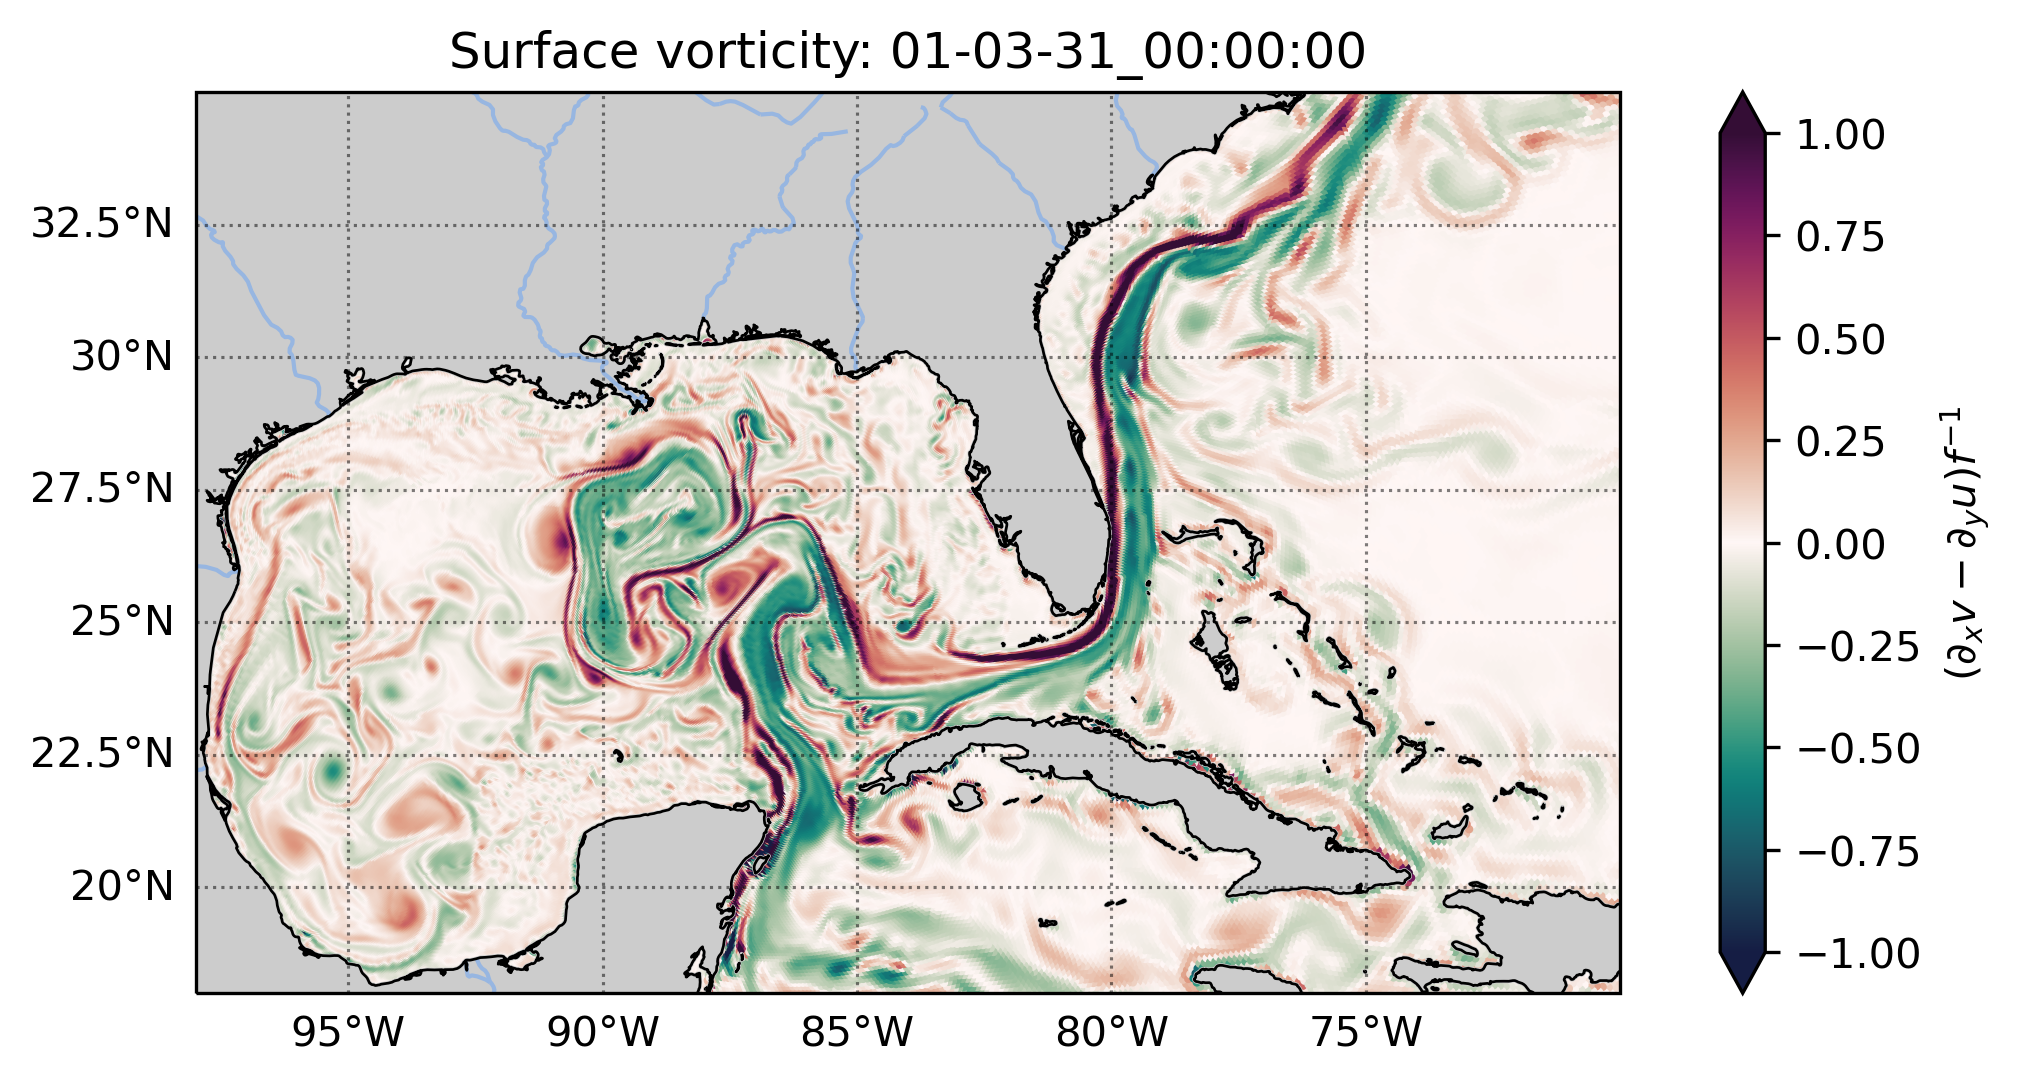

In [7]:
t = -1
fig, ax = plt.subplots(1, figsize = (8,3.5), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True, dpi = 300)

lat_rad = 1.0/np.cos(np.radians(latc_64.mean().values))

m = ax.scatter(lonc_64,latc_64,c=rv_64[t],
               cmap=plt.get_cmap('cmo.curl'),
               vmin=-1,vmax=1, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, -70, 18, 35], ccrs.PlateCarree())

ax.add_feature(land_10m, facecolor='0.8')
ax.set_aspect(lat_rad)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
ax.set_title('Surface vorticity: '+str(ds_64.xtime[t].values)[4:-1])
fig.canvas.draw()

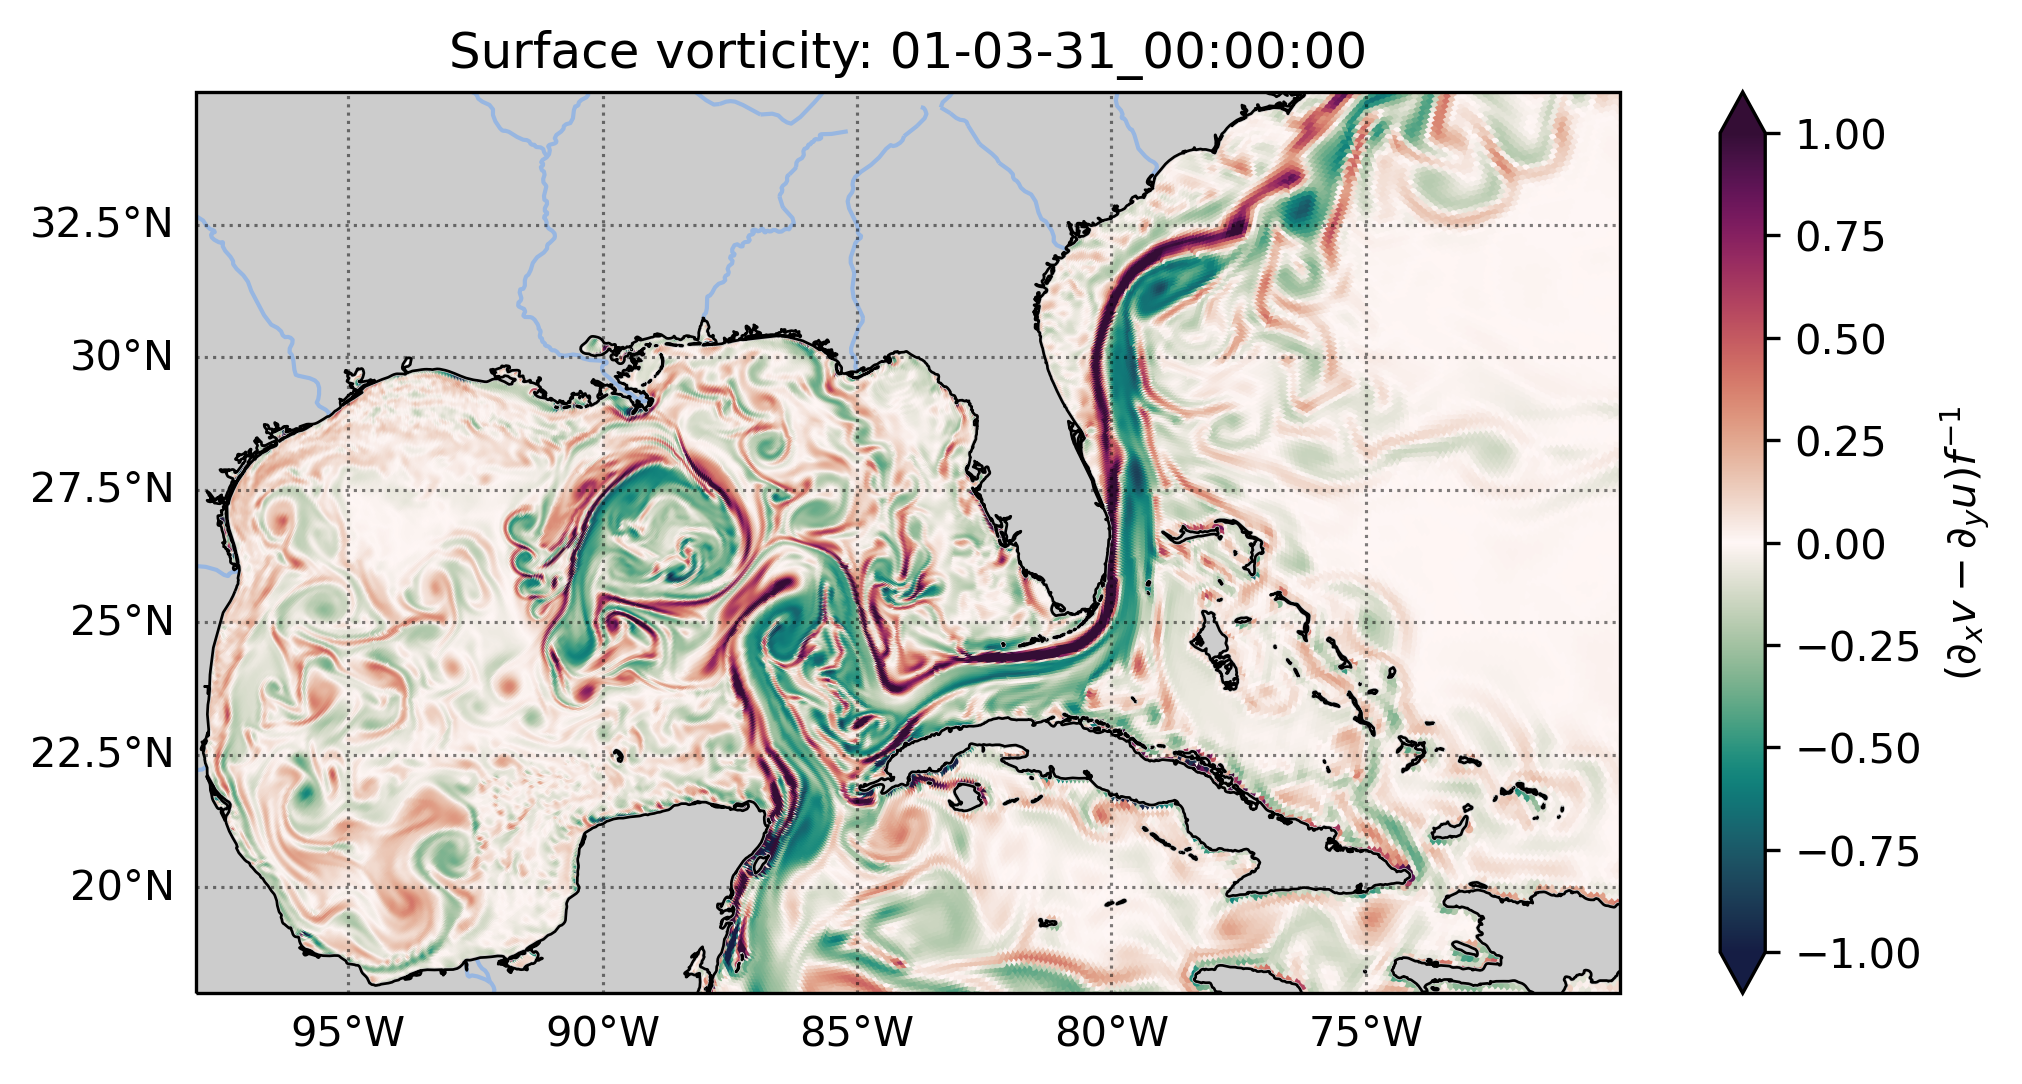

In [8]:
t = -1
fig, ax = plt.subplots(1, figsize = (8,3.5), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True, dpi = 300)

lat_rad = 1.0/np.cos(np.radians(latc_64.mean().values))

m = ax.scatter(lonc_128,latc_128,c=rv_128[t],
               cmap=plt.get_cmap('cmo.curl'),
               vmin=-1,vmax=1, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, -70, 18, 35], ccrs.PlateCarree())

ax.add_feature(land_10m, facecolor='0.8')
ax.set_aspect(lat_rad)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
ax.set_title('Surface vorticity: '+str(ds_128.xtime[t].values)[4:-1])
fig.canvas.draw()

### There appears to be noticeable differences, check the shelf/western GoM

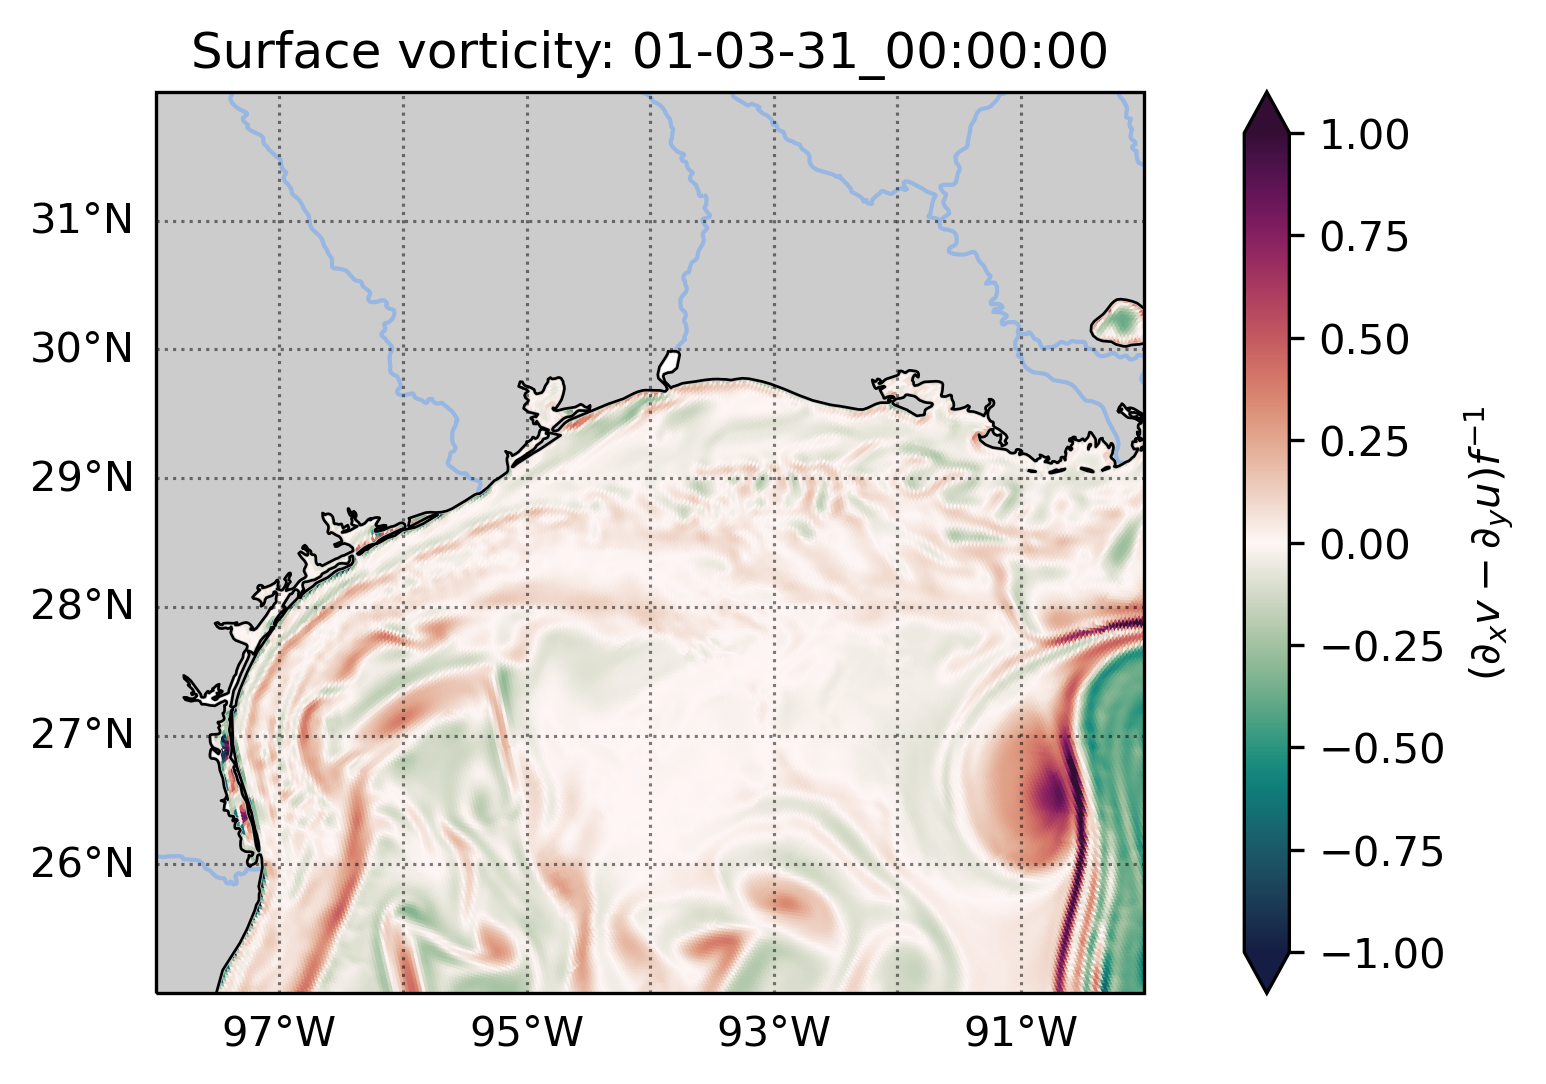

In [9]:
t = -1
fig, ax = plt.subplots(1, figsize = (8,3.5), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True, dpi = 300)

lat_rad = 1.0/np.cos(np.radians(latc_64.mean().values))

m = ax.scatter(lonc_64,latc_64,c=rv_64[t],
               cmap=plt.get_cmap('cmo.curl'),
               vmin=-1,vmax=1, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, -90, 25, 32], ccrs.PlateCarree())

ax.add_feature(land_10m, facecolor='0.8')
ax.set_aspect(lat_rad)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
ax.set_title('Surface vorticity: '+str(ds_64.xtime[t].values)[4:-1])
fig.canvas.draw()

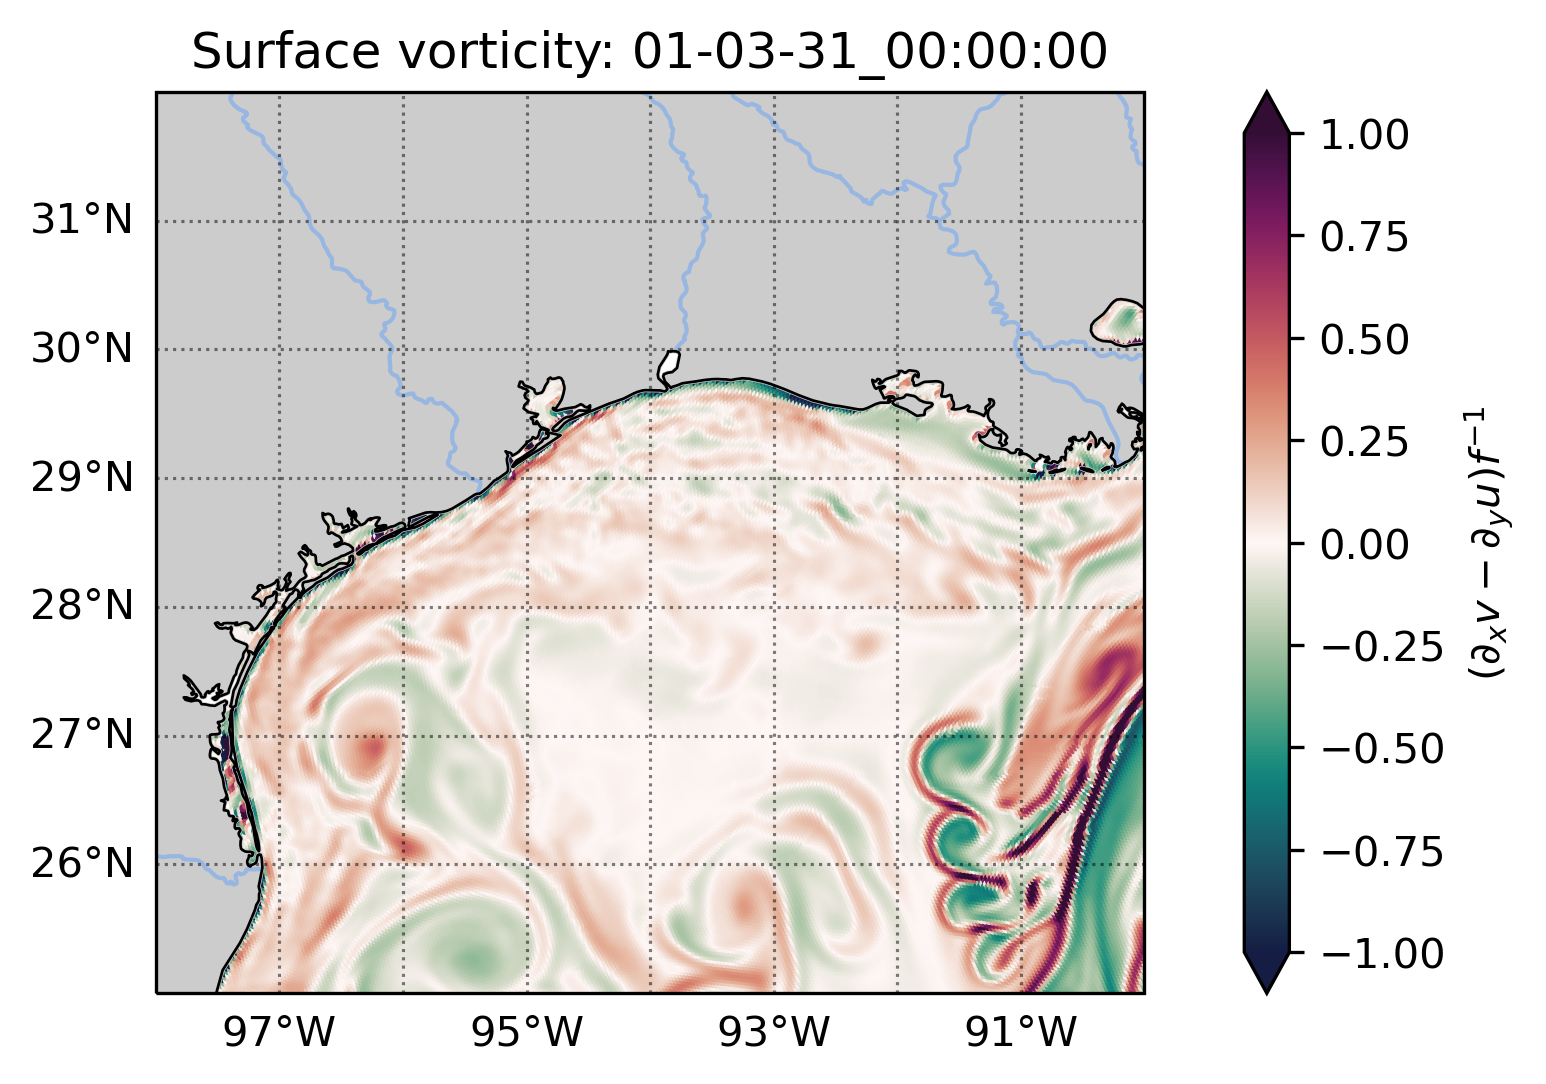

In [10]:
t = -1
fig, ax = plt.subplots(1, figsize = (8,3.5), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True, dpi = 300)

lat_rad = 1.0/np.cos(np.radians(latc_128.mean().values))

m = ax.scatter(lonc_128,latc_128,c=rv_128[t],
               cmap=plt.get_cmap('cmo.curl'),
               vmin=-1,vmax=1, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, -90, 25, 32], ccrs.PlateCarree())

ax.add_feature(land_10m, facecolor='0.8')
ax.set_aspect(lat_rad)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
ax.set_title('Surface vorticity: '+str(ds_128.xtime[t].values)[4:-1])
fig.canvas.draw()